In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils import *

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

## Datasets

### Members

```
members.csv
user information.

msno
city
bd: age. Note: this column has outlier values, please use your judgement.
gender
registered_via: registration method
registration_init_time: format %Y%m%d
expiration_date: format %Y%m%d
```

In [5]:
csv_folder_path = "kkbox-music-recommendation-challenge/csv_folder"

members_path = "members.csv"
song_extra_info_path = "song_extra_info.csv"
songs_path = "songs.csv"
train_path = "train.csv"

In [6]:
members_df = load_members(f"{csv_folder_path}/{members_path}")

members_df.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,2011-08-20,2017-09-20
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,2015-06-28,2017-06-22
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,2016-04-11,2017-07-12
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,2015-09-06,2015-09-07
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,2017-01-26,2017-06-13


In [7]:
members_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   msno                    34403 non-null  category      
 1   city                    34403 non-null  category      
 2   bd                      34403 non-null  uint8         
 3   gender                  14501 non-null  category      
 4   registered_via          34403 non-null  category      
 5   registration_init_time  34403 non-null  datetime64[ns]
 6   expiration_date         34403 non-null  datetime64[ns]
dtypes: category(4), datetime64[ns](2), uint8(1)
memory usage: 2.1 MB


In [8]:
show_unique_values(members_df)

Unique values:

msno: (34403,)
city: (21,)
bd: (94,)
gender: (3,)
registered_via: (6,)
registration_init_time: (3862,)
expiration_date: (1484,)


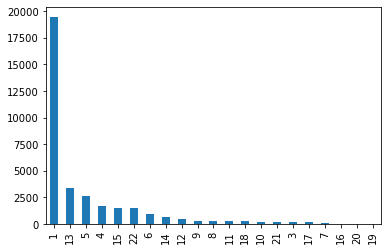

In [9]:
members_df.city.value_counts().plot(kind='bar')

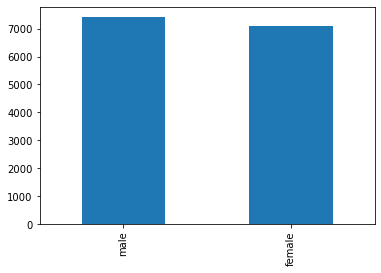

In [10]:
members_df.gender.value_counts().plot(kind='bar')

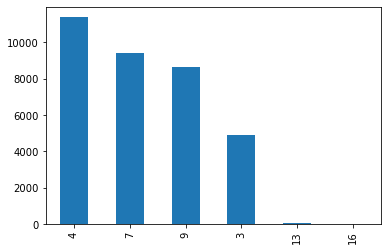

In [11]:
members_df.registered_via.value_counts().plot(kind='bar')

Unique ages: [  0  43  28  33  20  30  29  26  25  21  22  16  23  37  18  19  51  24
  17  45  36  57  27  34  32  15  48  50  54  47  35  46  31  14  41  59
   2  40  38  55  39  73  49  44 103  52  70  42  65  56 101  58  53  64
  63  76  66  97   3  72  67  62  61 105  60  13  90  12  68 131  74  89
 163 218 144  85 112  96  11 102  83  87   7  95 213 111  93   5  78   6
 106 107  82  10]


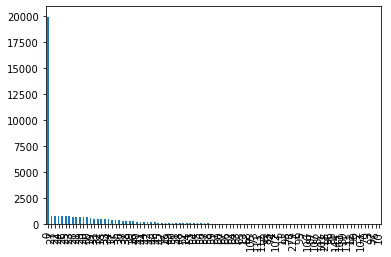

In [12]:
print(f"Unique ages: {members_df.bd.unique()}")

members_df.bd.value_counts().plot(kind='bar')

In [32]:
members_df.expiration_date - members_df.registration_init_time

0       2223 days
1        725 days
2        457 days
3          1 days
4        138 days
           ...   
34398   1399 days
34399    937 days
34400   1498 days
34401    701 days
34402      3 days
Length: 34403, dtype: timedelta64[ns]

### Songs

```
songs.csv
The songs. Note that data is in unicode.

song_id
song_length: in ms
genre_ids: genre category. Some songs have multiple genres and they are separated by |
artist_name
composer
lyricist
language
```

In [13]:
song_df = load_songs(f"{csv_folder_path}/{songs_path}")

song_df.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [14]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype   
---  ------       -----   
 0   song_id      category
 1   song_length  int32   
 2   genre_ids    category
 3   artist_name  category
 4   composer     category
 5   lyricist     category
 6   language     category
dtypes: category(6), int32(1)
memory usage: 157.6 MB


In [33]:
show_unique_values(song_df)

Unique values:

song_id: (2296320,)
song_length: (146534,)
genre_ids: (1046,)
artist_name: (222363,)
composer: (329824,)
lyricist: (110926,)
language: (11,)


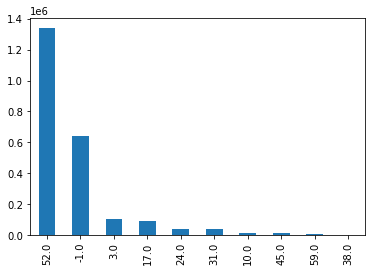

In [15]:
song_df.language.value_counts().plot(kind='bar')

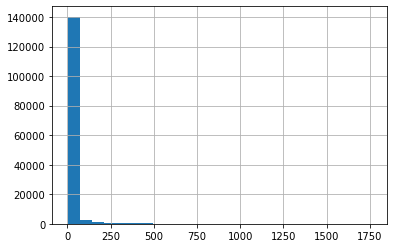

In [16]:
song_df.song_length.value_counts().hist(bins=25)

### Song extra info

```
song_extra_info.csv
song_id
song name - the name of the song.
isrc - International Standard Recording Code, theoretically can be used as an identity of a song. However, what worth to note is, ISRCs generated from providers have not been officially verified; therefore the information in ISRC, such as country code and reference year, can be misleading/incorrect. Multiple songs could share one ISRC since a single recording could be re-published several times.
```

In [17]:
song_extra_info = load_song_extra_info(f"{csv_folder_path}/{song_extra_info_path}")

song_extra_info.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [18]:
song_extra_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295971 entries, 0 to 2295970
Data columns (total 3 columns):
 #   Column   Dtype   
---  ------   -----   
 0   song_id  category
 1   name     category
 2   isrc     object  
dtypes: category(2), object(1)
memory usage: 158.2+ MB


In [34]:
show_unique_values(song_extra_info)

Unique values:

song_id: (2295971,)
name: (1168980,)
isrc: (1806826,)


### Train

```
test.csv
id: row id (will be used for submission)
msno: user id
song_id: song id
source_system_tab: the name of the tab where the event was triggered. System tabs are used to categorize KKBOX mobile apps functions. For example, tab my library contains functions to manipulate the local storage, and tab search contains functions relating to search.
source_screen_name: name of the layout a user sees.
source_type: an entry point a user first plays music on mobile apps. An entry point could be album, online-playlist, song .. etc.
target: this is the target variable. target=1 means there are recurring listening event(s) triggered within a month after the user’s very first observable listening event, target=0 otherwise .

```

In [20]:
train_df = load_train(f"{csv_folder_path}/{train_path}")

train_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
 #   Column              Dtype   
---  ------              -----   
 0   msno                category
 1   song_id             category
 2   source_system_tab   category
 3   source_screen_name  category
 4   source_type         category
 5   target              uint8   
dtypes: category(5), uint8(1)
memory usage: 82.4 MB


In [35]:
show_unique_values(train_df)

Unique values:

msno: (30755,)
song_id: (359966,)
source_system_tab: (9,)
source_screen_name: (21,)
source_type: (13,)
target: (2,)


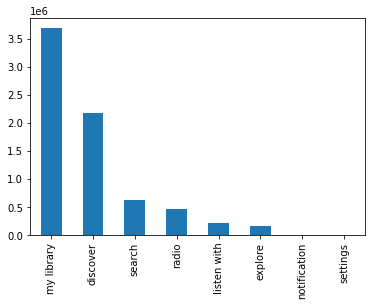

In [22]:
train_df.source_system_tab.value_counts().plot(kind='bar')

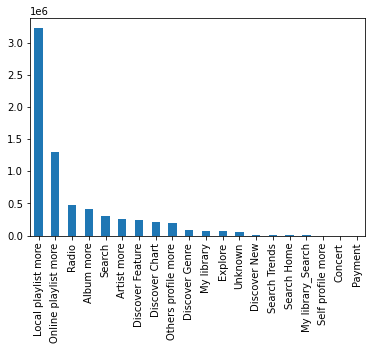

In [23]:
train_df.source_screen_name.value_counts().plot(kind='bar')

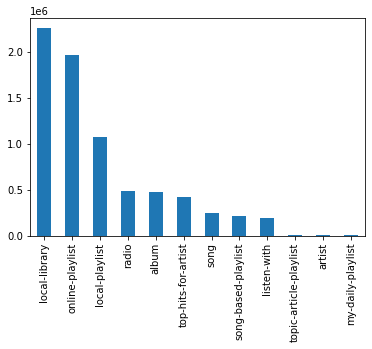

In [24]:
train_df.source_type.value_counts().plot(kind='bar')

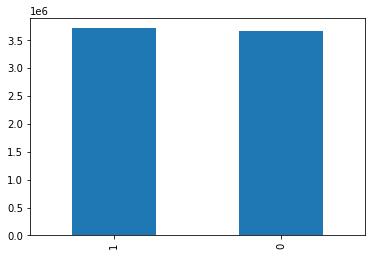

In [25]:
train_df.target.value_counts().plot(kind='bar')